# Property time in market - (time2event prediction)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r'C:\Users\Lenovo\Documents\_Datasets\Properties\liquidity_challenge.xlsx')

## 1. Data processing

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,property_id,event,time2event,property_type,surface_total,num_bathrooms,num_bedrooms,marketplace_hash,seller_hash,num_parking_lots,first_price,last_price,longitude,latitude,views,num_marketplaces_property_at,first_observed_date,last_observed_date,has_balcony,has_elevator,has_garden,has_gym,has_luxury_features,has_pool,has_studio,has_surveillance,has_terrace,has_visitors_parking,has_washing_area
0,069c4d09-1f4e-4451-bf9f-23130537bb37,1,96,apartment,120.0,2.5,2.0,-2.900368e+18,-7946976479905633280,1.0,4100000.0,4100000.0,-99.197758,19.377609,51,1,2023-06-04 04:01:08,2023-09-09 04:01:07,0,1,0,0,0,0,0,0,0,0,0
1,0a4c5851-88ae-4d33-8fb7-f7d50ca85389,0,37,apartment,82.0,2.0,2.0,8.261012e+18,1284474136562356992,2.0,4900000.0,4900000.0,-99.183100,19.402272,61,1,2023-09-09 01:06:12,2023-10-09 16:29:27,1,1,0,0,0,0,0,1,1,0,0
2,9d31a760-0ffd-44df-b77e-28fe6e1b019d,1,88,apartment,84.0,2.0,2.0,1.657070e+18,-3834970849644356096,1.0,2782696.0,2782696.0,-99.114488,19.399742,50,3,2023-07-05 18:47:41,2023-10-02 16:19:31,0,0,0,0,0,0,0,0,0,0,0
3,fb141128-2a00-4117-929d-ca7ef507d2ab,1,58,apartment,92.0,2.0,2.0,-2.900368e+18,-7946976479905633280,0.0,5280000.0,5280000.0,-99.176732,19.395337,68,2,2023-04-13 23:52:15,2023-06-11 04:01:48,1,1,0,0,0,0,0,1,0,0,0
4,b334cf18-5c23-4914-947a-d545c439845f,0,95,apartment,55.0,1.0,1.0,8.261012e+18,377027056504647872,1.0,3250000.0,3250000.0,-99.145629,19.433646,58,6,2023-07-12 22:27:30,2023-10-09 16:17:00,0,1,1,1,0,1,0,1,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4740 entries, 0 to 4739
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   property_id                   4740 non-null   object        
 1   event                         4740 non-null   int64         
 2   time2event                    4740 non-null   int64         
 3   property_type                 4740 non-null   object        
 4   surface_total                 4740 non-null   float64       
 5   num_bathrooms                 4645 non-null   float64       
 6   num_bedrooms                  4646 non-null   float64       
 7   marketplace_hash              4645 non-null   float64       
 8   seller_hash                   4740 non-null   int64         
 9   num_parking_lots              4645 non-null   float64       
 10  first_price                   4740 non-null   float64       
 11  last_price                    

In [6]:
df[['marketplace_hash', 'seller_hash']] = df[['marketplace_hash', 'seller_hash']].astype('object')

In [7]:
df.isnull().sum()

property_id                      0
event                            0
time2event                       0
property_type                    0
surface_total                    0
num_bathrooms                   95
num_bedrooms                    94
marketplace_hash                95
seller_hash                      0
num_parking_lots                95
first_price                      0
last_price                       0
longitude                        0
latitude                         0
views                            0
num_marketplaces_property_at     0
first_observed_date              0
last_observed_date               0
has_balcony                      0
has_elevator                     0
has_garden                       0
has_gym                          0
has_luxury_features              0
has_pool                         0
has_studio                       0
has_surveillance                 0
has_terrace                      0
has_visitors_parking             0
has_washing_area    

In [8]:
# Analyze 'property_type' categories
df['property_type'].value_counts()

property_type
apartment    3464
house        1276
Name: count, dtype: int64

In [9]:
df.describe()

,event,time2event,surface_total,num_bathrooms,num_bedrooms,num_parking_lots,first_price,last_price,longitude,latitude,views,num_marketplaces_property_at,first_observed_date,last_observed_date,has_balcony,has_elevator,has_garden,has_gym,has_luxury_features,has_pool,has_studio,has_surveillance,has_terrace,has_visitors_parking,has_washing_area
count,4740.000000,4740.000000,4740.000000,4645.000000,4646.000000,4645.000000,4.740000e+03,4.740000e+03,4740.000000,4740.000000,4740.000000,4740.000000,4740,4740,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000
mean,0.596414,65.138819,174.351380,2.253606,2.602884,1.985834,7.672510e+06,7.671930e+06,-99.183039,19.382338,53.562025,2.805485,2023-06-23 08:41:36.925316352,2023-08-26 08:52:28.804641280,0.260759,0.422574,0.345781,0.277848,0.001899,0.167089,0.075105,0.566456,0.439873,0.012236,0.295148
min,0.000000,6.000000,27.000000,1.000000,0.000000,0.000000,1.100000e+06,1.050000e+06,-99.329198,19.210562,0.000000,1.000000,2023-03-01 00:26:25,2023-03-10 21:00:33,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,29.000000,76.000000,2.000000,2.000000,1.000000,3.484780e+06,3.480831e+06,-99.211401,19.351280,43.000000,1.000000,2023-05-13 02:42:33.500000,2023-07-17 23:14:38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,55.500000,115.000000,2.000000,2.000000,2.000000,5.550794e+06,5.545750e+06,-99.176696,19.381730,54.000000,2.000000,2023-06-19 20:12:48,2023-09-11 19:06:06.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,91.000000,219.000000,3.000000,3.000000,2.000000,9.451250e+06,9.400000e+06,-99.152366,19.416898,68.000000,3.000000,2023-08-08 01:27:06,2023-10-09 17:32:44,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,178.000000,1350.000000,15.000000,6.000000,10.000000,4.100000e+07,1.044196e+08,-99.007713,19.552514,105.000000,20.000000,2023-10-10 00:34:56,2023-10-16 18:24:06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.490668,42.384843,154.220601,1.011588,0.930562,1.193088,6.599707e+06,6.736482e+06,0.049769,0.051527,19.111410,2.847190,NaN,NaN,0.439095,0.494021,0.475672,0.447985,0.043538,0.373094,0.263589,0.495616,0.496424,0.109950,0.456157


In [10]:
df.describe(include='object')

,property_id,property_type,marketplace_hash,seller_hash
count,4740,4740,4.645000e+03,4740
unique,4740,2,8.000000e+00,713
top,069c4d09-1f4e-4451-bf9f-23130537bb37,apartment,8.261012e+18,377027056504647872
freq,1,3464,1.565000e+03,1563


In [11]:
# Removing unnecesary variables that doesn't affect time2event
df.drop(columns=['property_id'], inplace=True)

It could be considered that the following variables are not correlated to time2event, but they are going to be analyzed as they could affect indirectly: 
* marketplace_hash
* seller_hash



In [12]:
df.groupby(['seller_hash'], as_index=False)['time2event'].mean().sort_values('time2event', ascending=False)

,seller_hash,time2event
203,-3360937248848343040,173.0
146,-5044457229517483008,172.5
99,-6380261238330616832,172.5
659,7966113346199360512,172.0
384,1393102038750145024,166.0
...,...,...
362,797619241062466176,13.0
283,-1447896062751783936,12.0
374,1145233659307577984,8.0
6,-9040851303670739968,6.0


In [13]:
df.groupby(['marketplace_hash'], as_index=False)['time2event'].mean().sort_values('time2event', ascending=False)

,marketplace_hash,time2event
0,-8593032714103325696.0,86.933333
3,-1055582272576819968.0,82.096335
1,-2900368119329458176.0,75.435065
4,1657069623777658112.0,62.949672
7,8261012051854438400.0,62.345048
2,-2809056857135862784.0,60.000000
6,6901946972740168704.0,54.857143
5,6474342183352086528.0,52.353414


This indicates that there are sellers and marketplaces with different values for time2event, so they will be kept for analysis.

### Analyzing and cleaning null values

In [14]:
df[df['num_bathrooms'].isnull() | df['num_bedrooms'].isnull() | df['num_parking_lots'].isnull()].shape


(278, 28)

In [15]:
df['num_bathrooms'].value_counts()

num_bathrooms
2.0     2164
1.0      949
3.0      710
4.0      283
2.5      177
3.5      150
5.0       82
4.5       51
1.5       34
6.0       28
5.5       16
15.0       1
Name: count, dtype: int64

<BarContainer object of 12 artists>

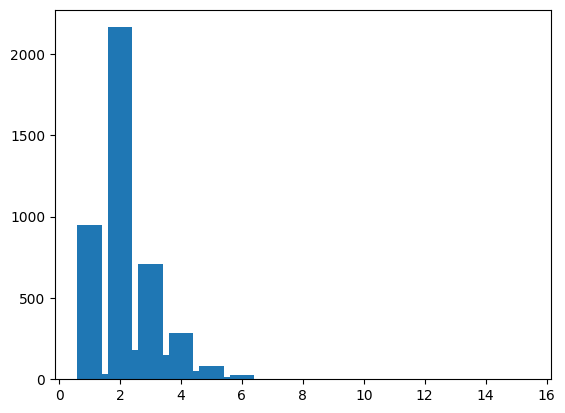

In [16]:
plt.bar(df['num_bathrooms'].value_counts().index, df['num_bathrooms'].value_counts().values)

<BarContainer object of 12 artists>

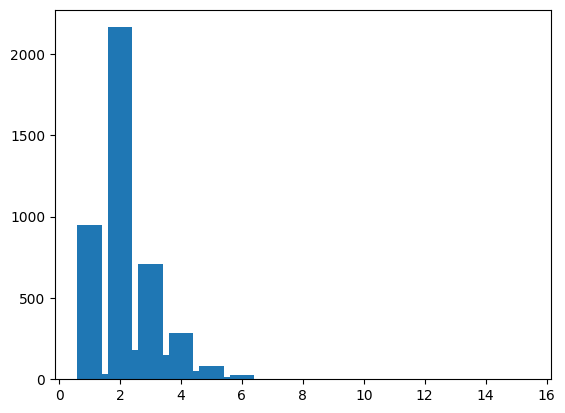

In [17]:
plt.bar(df['num_bathrooms'].value_counts().index, df['num_bathrooms'].value_counts().values)

<BarContainer object of 27 artists>

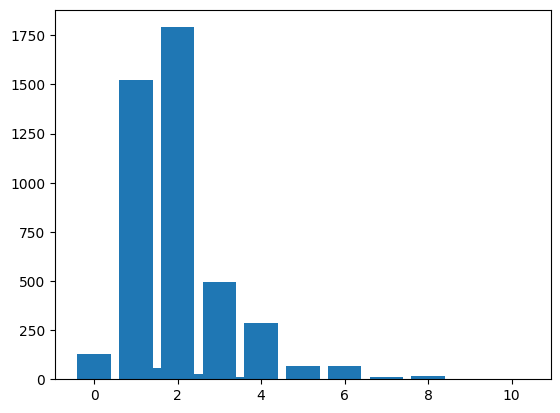

In [18]:
plt.bar(df['num_parking_lots'].value_counts().index, df['num_parking_lots'].value_counts().values)

In [19]:
# pd.set_option('display.max_rows', None)
df[df['num_bathrooms'].isnull() | df['num_bedrooms'].isnull() | df['num_parking_lots'].isnull()].head(10)
# pd.set_option('display.max_rows', 60)

,event,time2event,property_type,surface_total,num_bathrooms,num_bedrooms,marketplace_hash,seller_hash,num_parking_lots,first_price,last_price,longitude,latitude,views,num_marketplaces_property_at,first_observed_date,last_observed_date,has_balcony,has_elevator,has_garden,has_gym,has_luxury_features,has_pool,has_studio,has_surveillance,has_terrace,has_visitors_parking,has_washing_area
33,1,27,apartment,54.0,1.0,2.0,1657069623777658112.0,377027056504647872,NaN,1.590000e+06,1590000.0,-99.131709,19.422203,99,1,2023-05-30 23:54:49,2023-06-27 04:18:32,0,0,0,0,0,0,0,0,0,0,0
74,0,41,apartment,95.0,2.0,NaN,6474342183352086528.0,7660106968899665920,1.0,6.743225e+06,6743225.0,-99.162992,19.423931,59,2,2023-09-04 20:20:57,2023-10-09 18:23:23,0,0,0,0,0,0,0,0,0,0,0
109,1,25,house,230.0,3.0,NaN,1657069623777658112.0,377027056504647872,3.0,6.900000e+06,6900000.0,-99.134893,19.290818,64,1,2023-06-08 06:58:21,2023-07-04 05:05:30,0,0,1,0,0,0,1,0,0,0,0
114,1,61,apartment,49.0,1.0,NaN,6474342183352086528.0,-881764696607162880,1.0,1.770000e+06,1770000.0,-99.120710,19.390620,55,3,2023-04-04 00:50:37,2023-06-04 04:10:30,0,0,0,0,0,0,0,0,0,0,0
145,0,137,house,735.0,NaN,4.0,-1055582272576819968.0,4663607486357746688,4.0,2.657442e+07,30000000.0,-99.261433,19.389506,35,2,2023-05-31 22:36:56,2023-10-16 17:07:58,1,0,1,0,0,0,0,1,0,0,0
157,0,21,apartment,123.0,2.0,2.0,1657069623777658112.0,377027056504647872,NaN,6.800000e+06,6800000.0,-99.212477,19.433370,44,2,2023-09-25 01:06:00,2023-10-09 16:21:31,0,1,0,0,0,0,0,0,0,0,0
158,0,135,apartment,76.0,2.0,NaN,8261012051854438400.0,4493088816222788096,1.0,3.876000e+06,3876000.0,-99.169567,19.430641,57,1,2023-06-03 06:24:30,2023-10-09 16:18:29,0,1,0,0,0,0,0,0,0,0,0
187,1,21,apartment,90.0,NaN,2.0,1657069623777658112.0,-3834970849644356096,2.0,5.012919e+06,5012919.0,-99.218984,19.339229,0,13,2023-09-11 01:40:19,2023-10-02 16:05:15,0,0,0,1,0,0,0,1,1,0,0
199,0,47,apartment,80.0,2.0,2.0,-1055582272576819968.0,-7027446107491363840,NaN,4.480000e+06,4480000.0,-99.167130,19.392554,53,2,2023-08-29 17:24:06,2023-10-16 16:06:35,0,1,0,0,0,0,0,1,1,0,0
210,1,48,apartment,133.0,NaN,3.0,1657069623777658112.0,-881764696607162880,3.0,8.000070e+06,8000070.0,-99.200512,19.443241,54,1,2023-06-21 04:06:28,2023-08-08 04:20:34,0,1,0,1,0,1,0,0,1,0,0


There is no relation or pattern found in the NaN values for bedrooms or bathrooms. As NaN values represent slighlty more than 5% of the values, the ebst strategy would be to replace by the mode value.

In [20]:
# Replacing for the Mode value which is 2.0
df.loc[df['num_bathrooms'].isnull(), 'num_bathrooms'] = 2.0
df.loc[df['num_bedrooms'].isnull(), 'num_bedrooms'] = 2.0
df.loc[df['num_parking_lots'].isnull(), 'num_parking_lots'] = 2.0

# Replacing for a new category as "Unknown"
df.loc[df['marketplace_hash'].isnull(), 'marketplace_hash'] = 'Unknown'

In [21]:
df.isna().sum()

event                           0
time2event                      0
property_type                   0
surface_total                   0
num_bathrooms                   0
num_bedrooms                    0
marketplace_hash                0
seller_hash                     0
num_parking_lots                0
first_price                     0
last_price                      0
longitude                       0
latitude                        0
views                           0
num_marketplaces_property_at    0
first_observed_date             0
last_observed_date              0
has_balcony                     0
has_elevator                    0
has_garden                      0
has_gym                         0
has_luxury_features             0
has_pool                        0
has_studio                      0
has_surveillance                0
has_terrace                     0
has_visitors_parking            0
has_washing_area                0
dtype: int64

Now there are no null values anymore.

### Feature engineering

Converting first_price and last_price into millions to simplify further analysis

In [22]:
df['first_price'] = df['first_price'] / 1e6
df['last_price'] = df['last_price'] / 1e6

In [23]:
df.describe()

,event,time2event,surface_total,num_bathrooms,num_bedrooms,num_parking_lots,first_price,last_price,longitude,latitude,views,num_marketplaces_property_at,first_observed_date,last_observed_date,has_balcony,has_elevator,has_garden,has_gym,has_luxury_features,has_pool,has_studio,has_surveillance,has_terrace,has_visitors_parking,has_washing_area
count,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740,4740,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000
mean,0.596414,65.138819,174.351380,2.248523,2.590928,1.986118,7.672510,7.671930,-99.183039,19.382338,53.562025,2.805485,2023-06-23 08:41:36.925316352,2023-08-26 08:52:28.804641280,0.260759,0.422574,0.345781,0.277848,0.001899,0.167089,0.075105,0.566456,0.439873,0.012236,0.295148
min,0.000000,6.000000,27.000000,1.000000,0.000000,0.000000,1.100000,1.050000,-99.329198,19.210562,0.000000,1.000000,2023-03-01 00:26:25,2023-03-10 21:00:33,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,29.000000,76.000000,2.000000,2.000000,1.000000,3.484780,3.480831,-99.211401,19.351280,43.000000,1.000000,2023-05-13 02:42:33.500000,2023-07-17 23:14:38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,55.500000,115.000000,2.000000,2.000000,2.000000,5.550795,5.545750,-99.176696,19.381730,54.000000,2.000000,2023-06-19 20:12:48,2023-09-11 19:06:06.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,91.000000,219.000000,3.000000,3.000000,2.000000,9.451250,9.400000,-99.152366,19.416898,68.000000,3.000000,2023-08-08 01:27:06,2023-10-09 17:32:44,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,178.000000,1350.000000,15.000000,6.000000,10.000000,41.000000,104.419615,-99.007713,19.552514,105.000000,20.000000,2023-10-10 00:34:56,2023-10-16 18:24:06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.490668,42.384843,154.220601,1.002028,0.925114,1.181071,6.599707,6.736482,0.049769,0.051527,19.111410,2.847190,NaN,NaN,0.439095,0.494021,0.475672,0.447985,0.043538,0.373094,0.263589,0.495616,0.496424,0.109950,0.456157


In [24]:
#Analyzing the top values for 'first_price' 
df['first_price'].sort_values(ascending=False).head()

4390    41.00
4453    40.70
2415    40.00
1317    39.95
2283    39.90
Name: first_price, dtype: float64

In [25]:
#Analyzing the top values for 'last_price' 
df['last_price'].sort_values(ascending=False).head()

91      104.419615
1583     41.027000
4390     41.000000
4453     40.700000
827      40.197265
Name: last_price, dtype: float64

In [26]:
df.loc[[91]]

,event,time2event,property_type,surface_total,num_bathrooms,num_bedrooms,marketplace_hash,seller_hash,num_parking_lots,first_price,last_price,longitude,latitude,views,num_marketplaces_property_at,first_observed_date,last_observed_date,has_balcony,has_elevator,has_garden,has_gym,has_luxury_features,has_pool,has_studio,has_surveillance,has_terrace,has_visitors_parking,has_washing_area
91,1,95,house,805.0,4.0,4.0,8261012051854438400.0,377027056504647872,1.4,5.95,104.419615,-99.26115,19.350184,37,4,2023-06-08 01:16:38,2023-09-11 19:45:01,0,0,1,1,0,1,0,1,1,0,0


Now, a new variable will be created based on first_price and last_price. It will be 'price_change_pct', as it will indicate if the original price was increased (or decreased), and 'first_price' will be dropped, as it would be redundant. 

This relative change will be positive values for prices increases and negative values for price decreases, so this could be helpful for the esitmation of time2event.

In [27]:
df['price_change_pct'] = (df['last_price'] - df['first_price']) / df['first_price']

In [28]:
# Reordering columns in the DataFrame and also removing the 'first_price' column

columns_order = ['event', 'time2event', 'property_type', 'surface_total',
       'num_bathrooms', 'num_bedrooms', 'marketplace_hash', 'seller_hash',
       'num_parking_lots', 'last_price', 'price_change_pct', 'longitude',
       'latitude', 'views', 'num_marketplaces_property_at',
       'first_observed_date', 'last_observed_date', 'has_balcony',
       'has_elevator', 'has_garden', 'has_gym', 'has_luxury_features',
       'has_pool', 'has_studio', 'has_surveillance', 'has_terrace',
       'has_visitors_parking', 'has_washing_area']

df = df[columns_order]

In [29]:
#Analyzing the price_change_pct values for some records
df[df['price_change_pct'] != 0].head()

,event,time2event,property_type,surface_total,num_bathrooms,num_bedrooms,marketplace_hash,seller_hash,num_parking_lots,last_price,price_change_pct,longitude,latitude,views,num_marketplaces_property_at,first_observed_date,last_observed_date,has_balcony,has_elevator,has_garden,has_gym,has_luxury_features,has_pool,has_studio,has_surveillance,has_terrace,has_visitors_parking,has_washing_area
8,1,85,apartment,77.0,2.0,2.0,8261012051854438400.0,-1512156758366620928,2.0,5.500000,-0.500000,-99.200731,19.443135,54,1,2023-06-11 01:09:08,2023-09-04 18:32:44,0,1,1,1,0,1,0,1,1,0,0
13,1,171,apartment,207.0,3.5,3.0,-1055582272576819968.0,8620796227298003968,2.0,14.800000,0.156250,-99.214268,19.431386,44,1,2023-04-14 12:18:08,2023-10-02 18:12:50,1,1,1,0,0,0,1,1,1,0,1
14,1,26,apartment,67.0,2.0,2.0,8261012051854438400.0,7660106968899665920,1.0,4.650003,0.009334,-99.174955,19.362579,79,1,2023-07-12 01:11:57,2023-08-07 19:49:29,0,0,0,0,0,0,0,1,0,0,1
17,1,162,apartment,66.0,2.0,2.0,8261012051854438400.0,8646089281377911808,1.0,2.900000,-0.016949,-99.139951,19.358549,45,10,2023-04-23 01:25:11,2023-10-02 16:15:51,0,1,0,0,0,0,0,1,1,0,1
19,0,123,apartment,67.7,1.0,2.0,-1055582272576819968.0,504538504805267328,1.0,2.790000,-0.027875,-99.144232,19.375412,65,1,2023-06-15 14:35:34,2023-10-16 16:05:40,0,0,0,0,0,0,0,0,0,0,0


In [30]:
df.loc[[91]]

,event,time2event,property_type,surface_total,num_bathrooms,num_bedrooms,marketplace_hash,seller_hash,num_parking_lots,last_price,price_change_pct,longitude,latitude,views,num_marketplaces_property_at,first_observed_date,last_observed_date,has_balcony,has_elevator,has_garden,has_gym,has_luxury_features,has_pool,has_studio,has_surveillance,has_terrace,has_visitors_parking,has_washing_area
91,1,95,house,805.0,4.0,4.0,8261012051854438400.0,377027056504647872,1.4,104.419615,16.549515,-99.26115,19.350184,37,4,2023-06-08 01:16:38,2023-09-11 19:45:01,0,0,1,1,0,1,0,1,1,0,0


A change from 6 M USD to 104 M USD with a 1,654% increase is extremely unusual, and there's a high probability that there's a mistake with this data. 

As now we have this new variable of 'price_change_pct' and this value is an outlier, the best idea would be to remove this record.

In [31]:
# Removing the record with an unusual prince change percentage
df = df.drop(91).reset_index(drop=True)


In [32]:
#Analyzing the top values for 'last_price', which now makes sense
df['last_price'].sort_values(ascending=False).head()

1582    41.027000
4389    41.000000
4452    40.700000
826     40.197265
2414    40.000000
Name: last_price, dtype: float64

## 2. Data visualization

<Axes: xlabel='time2event', ylabel='Count'>

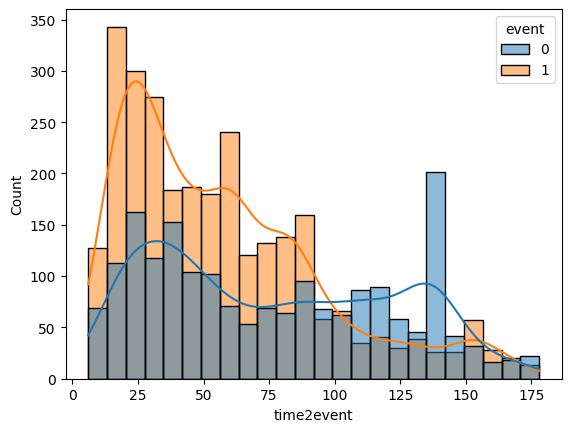

In [33]:
sns.histplot(data = df, x= 'time2event', hue='event', kde=True)

In [34]:
df[df['event'] == 0]['time2event'].describe()

count    1913.000000
mean       76.857815
std        45.334481
min         6.000000
25%        36.000000
50%        73.000000
75%       118.000000
max       178.000000
Name: time2event, dtype: float64

In [35]:
df[df['event'] == 1]['time2event'].describe()

count    2826.000000
mean       57.195329
std        38.290886
min         6.000000
25%        26.000000
50%        48.000000
75%        80.000000
max       178.000000
Name: time2event, dtype: float64

In [36]:
# time2event mode for properties not sold
df[df['event'] == 0]['time2event'].mode()

0    137
Name: time2event, dtype: int64

In [37]:
#Analyzing records where time to event is 137 days, which is the mode
df[(df['event'] == 0) & (df['time2event'] == 137)].head(5)

,event,time2event,property_type,surface_total,num_bathrooms,num_bedrooms,marketplace_hash,seller_hash,num_parking_lots,last_price,price_change_pct,longitude,latitude,views,num_marketplaces_property_at,first_observed_date,last_observed_date,has_balcony,has_elevator,has_garden,has_gym,has_luxury_features,has_pool,has_studio,has_surveillance,has_terrace,has_visitors_parking,has_washing_area
9,0,137,apartment,88.0,2.0,2.0,-1055582272576819968.0,377027056504647872,1.0,5.7,0.0,-99.185352,19.385228,72,5,2023-05-31 20:54:11,2023-10-16 16:07:34,1,1,0,1,0,0,0,1,1,0,1
71,0,137,apartment,90.0,2.5,2.0,-1055582272576819968.0,377027056504647872,3.0,5.5,0.0,-99.255260,19.378529,8,1,2023-05-31 20:49:13,2023-10-16 16:02:00,0,1,1,1,0,0,0,1,1,0,1
84,0,137,apartment,430.0,3.5,3.0,-1055582272576819968.0,-8030888905824435200,3.0,16.0,0.0,-99.275786,19.362551,46,3,2023-05-31 21:00:36,2023-10-16 16:14:56,1,1,1,1,0,0,0,1,1,0,0
98,0,137,house,220.0,3.0,3.0,-1055582272576819968.0,-4491691270040378880,3.0,3.0,0.0,-99.254674,19.306518,48,4,2023-05-31 22:37:54,2023-10-16 17:09:08,0,0,0,0,0,0,0,0,1,0,0
100,0,137,apartment,56.0,1.0,1.0,-1055582272576819968.0,-7027446107491363840,1.0,3.1,0.0,-99.145629,19.433646,58,4,2023-05-31 21:01:50,2023-10-16 16:16:23,0,1,0,1,0,1,0,1,0,0,0


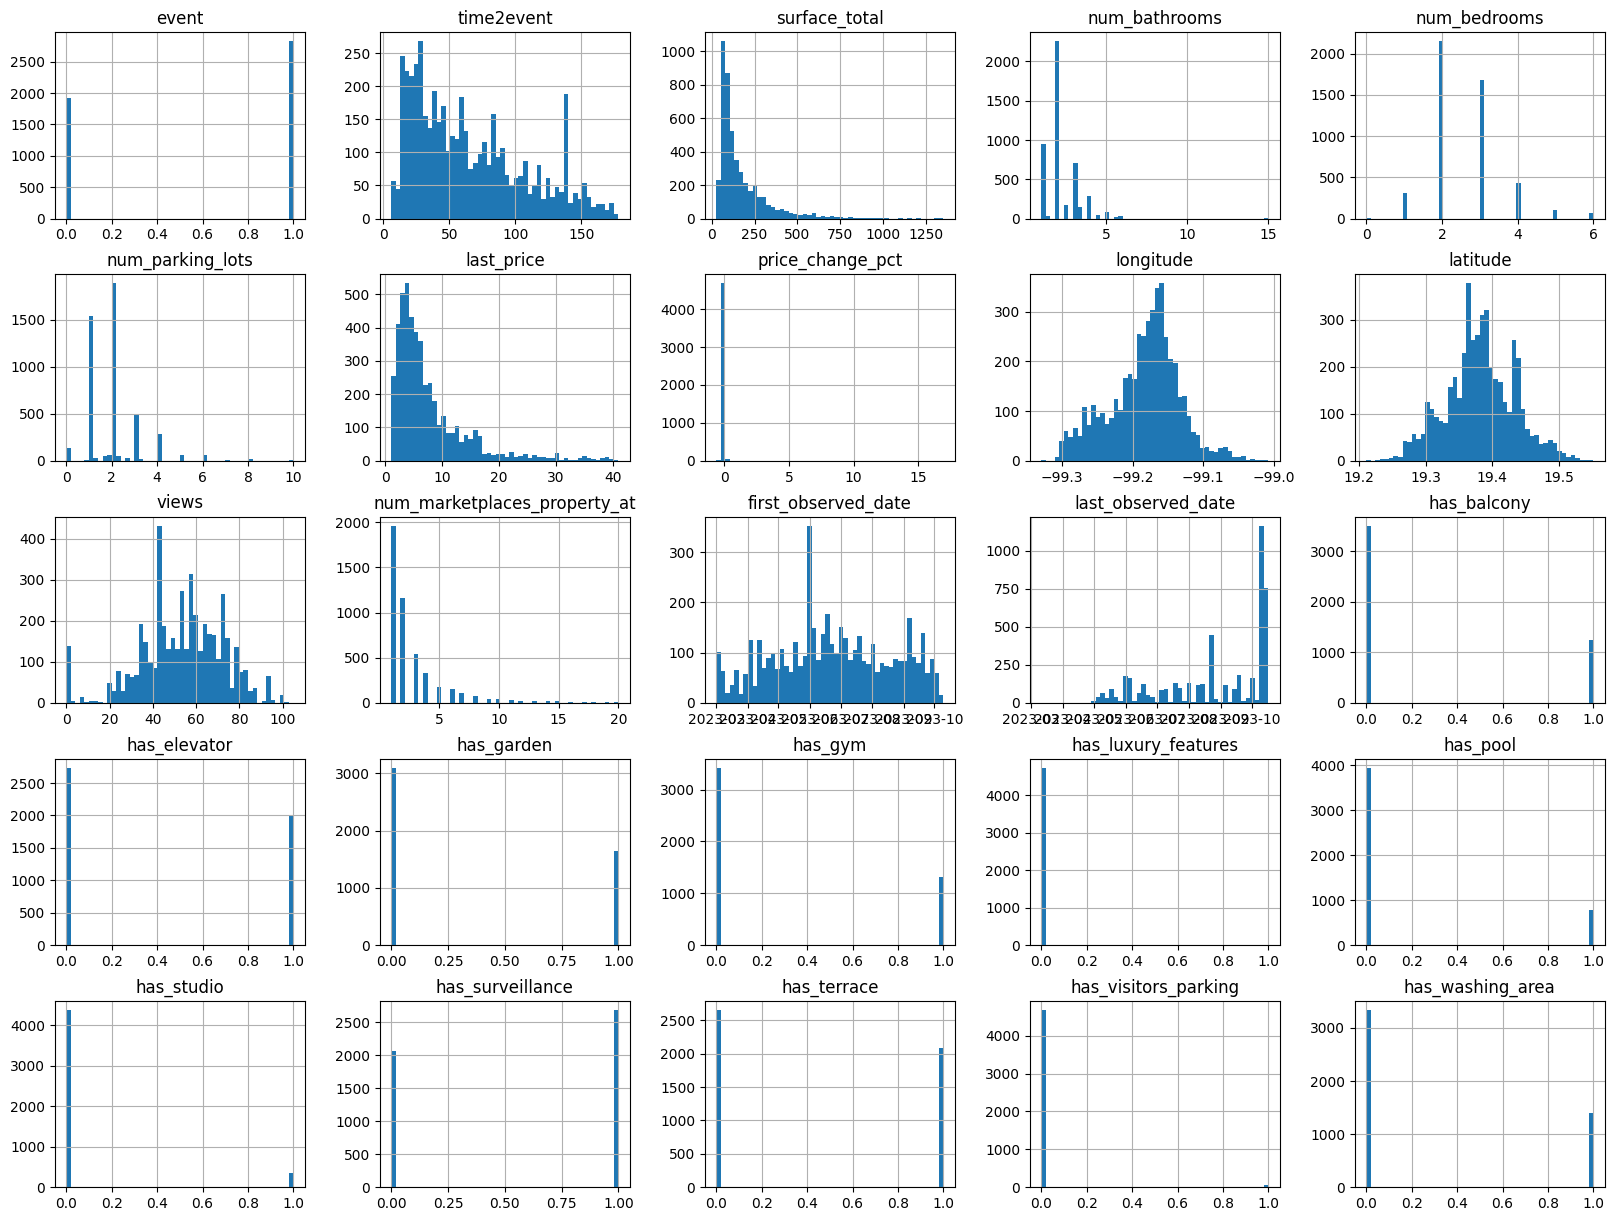

In [38]:
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

### **Event** Analysis

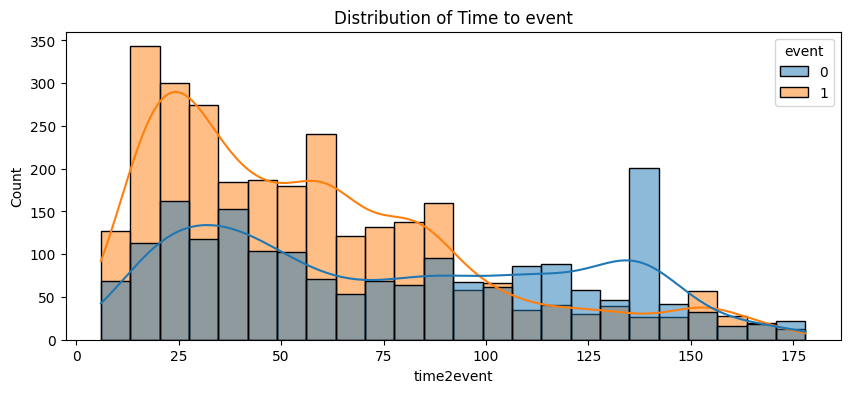

In [75]:
plt.figure(figsize=(10, 4))
plt.title('Distribution of Time to event')
sns.histplot(data=df, x='time2event', hue='event', kde=True)
plt.show()

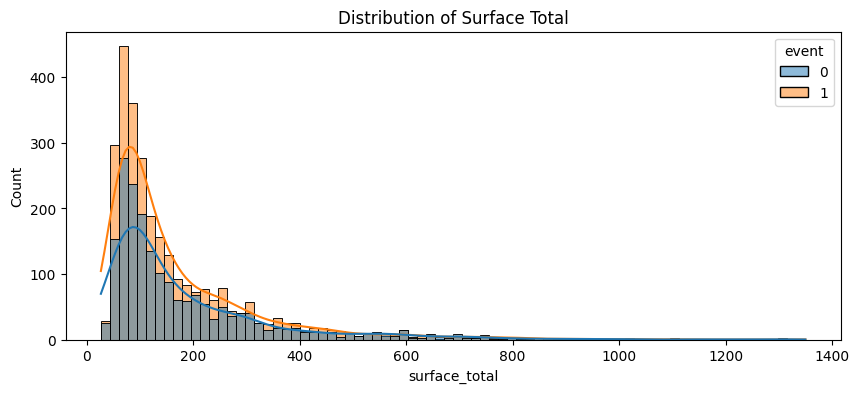

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Distribution of Surface Total')
sns.histplot(data=df, x='surface_total', hue='event', kde=True)
plt.show()

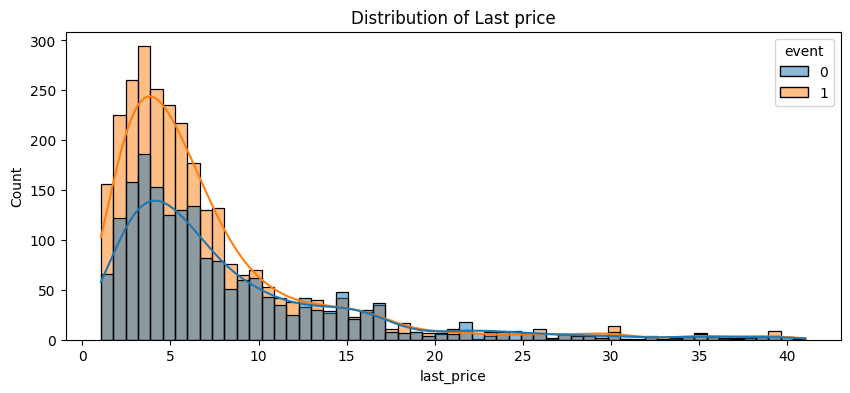

In [70]:
plt.figure(figsize=(10, 4))
plt.title('Distribution of Last price')
sns.histplot(data=df, x='last_price', hue='event', kde=True)
plt.show()

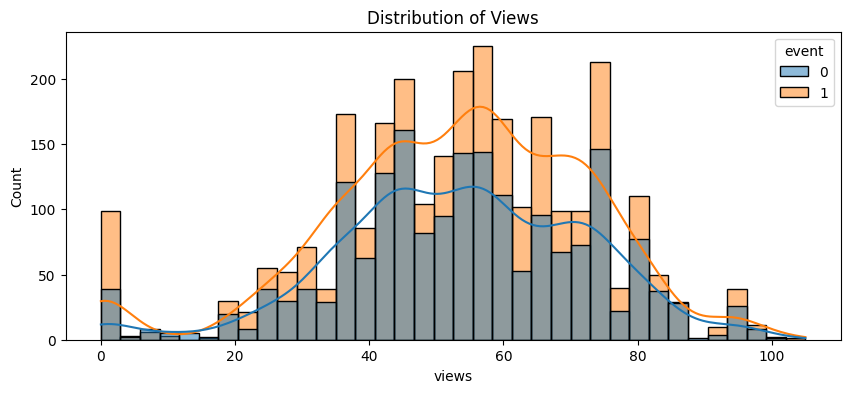

In [69]:
plt.figure(figsize=(10, 4))
plt.title('Distribution of Views')
sns.histplot(data=df, x='views', hue='event', kde=True)
plt.show()

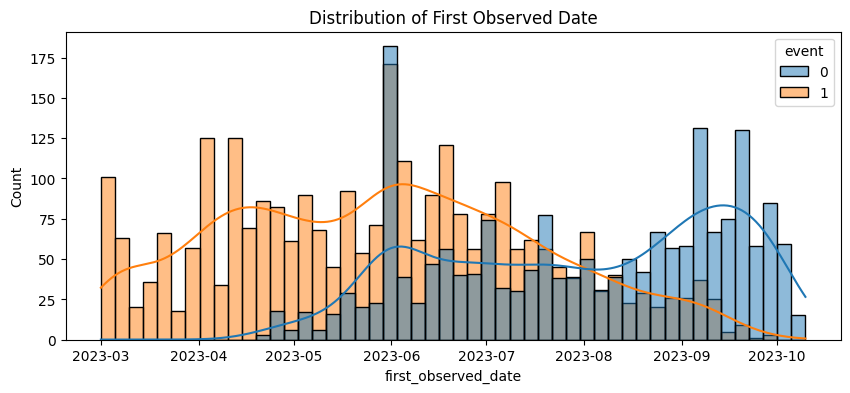

In [104]:
plt.figure(figsize=(10, 4))
plt.title('Distribution of First Observed Date')
sns.histplot(data=df, x='first_observed_date', hue='event', bins=50, kde=True)
plt.show()

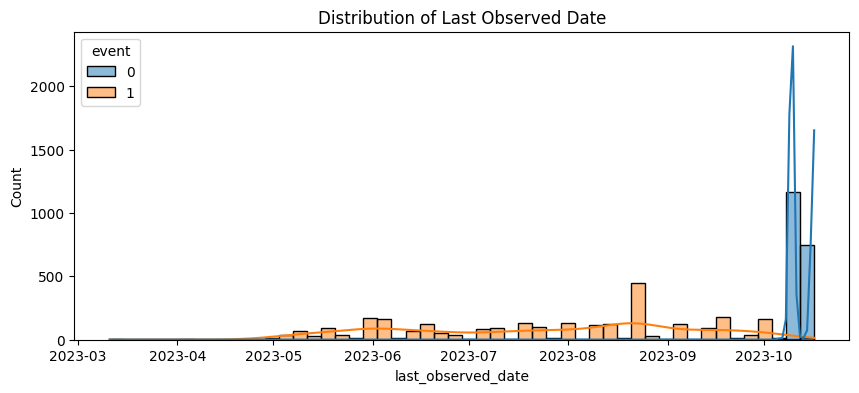

In [107]:
plt.figure(figsize=(10, 4))
plt.title('Distribution of Last Observed Date')
sns.histplot(data=df, x='last_observed_date', hue='event', bins=50, kde=True)
plt.show()

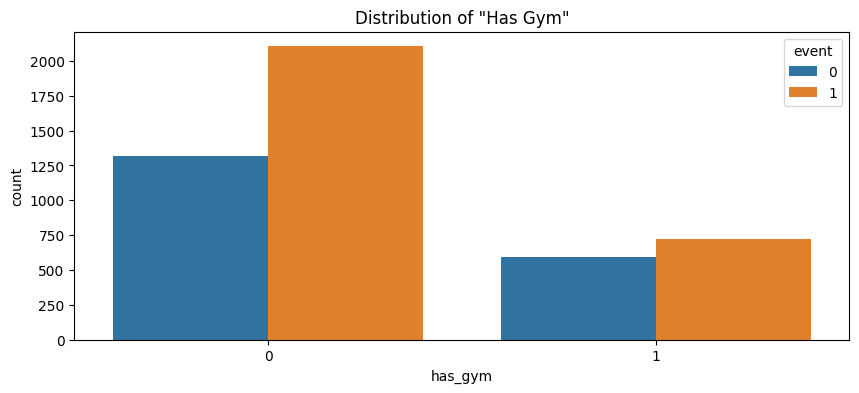

In [105]:
plt.figure(figsize=(10, 4))
plt.title('Distribution of "Has Gym"')
sns.countplot(data=df, x='has_gym', hue='event')
plt.show()

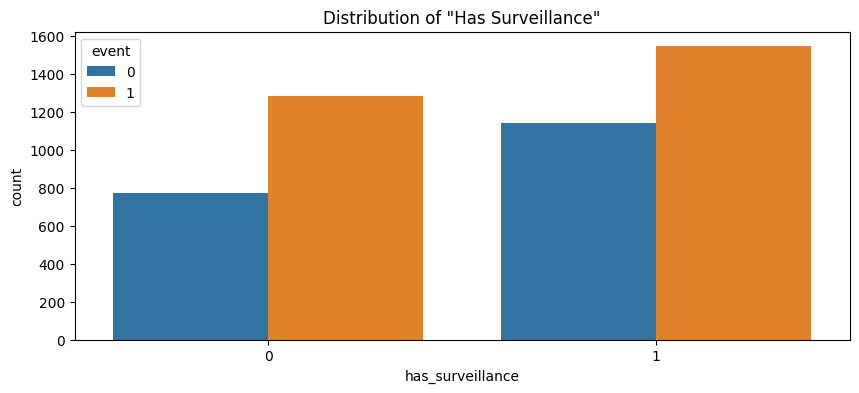

In [103]:
plt.figure(figsize=(10, 4))
plt.title('Distribution of "Has Surveillance"')
sns.countplot(data=df, x='has_surveillance', hue='event')
plt.show()

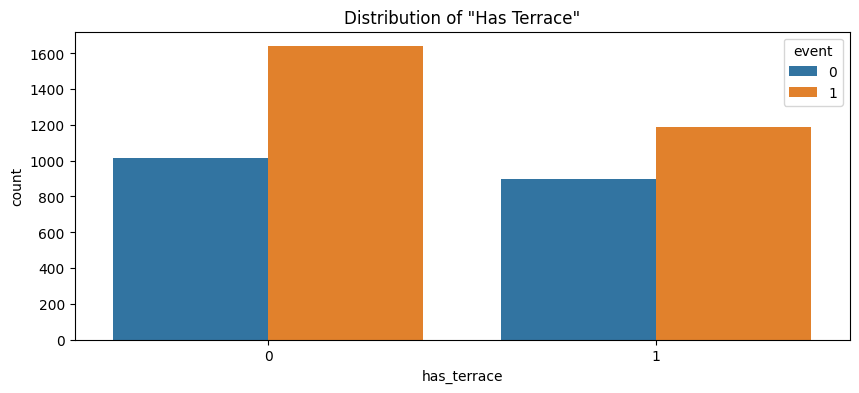

In [85]:
plt.figure(figsize=(10, 4))
plt.title('Distribution of "Has Terrace"')
sns.countplot(data=df, x='has_terrace', hue='event')
plt.show()

### **time2event** Analysis

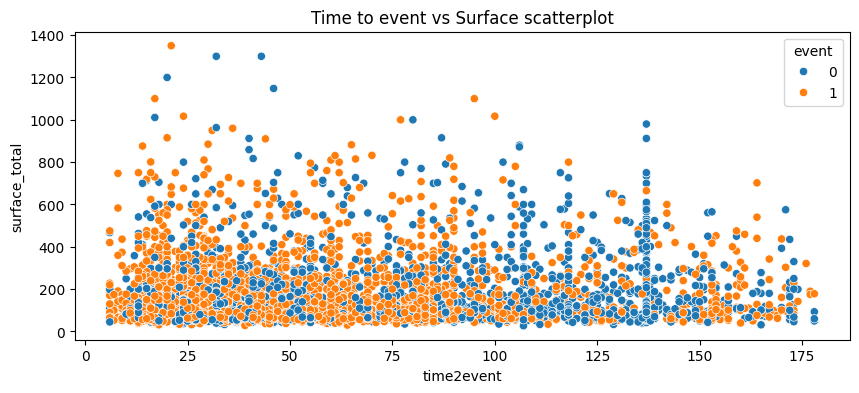

In [91]:
# Distribution of parking spaces
plt.figure(figsize=(10, 4))
plt.title("Time to event vs Surface scatterplot")
sns.scatterplot(data = df, x = 'time2event', y='surface_total', hue = 'event')
plt.show()

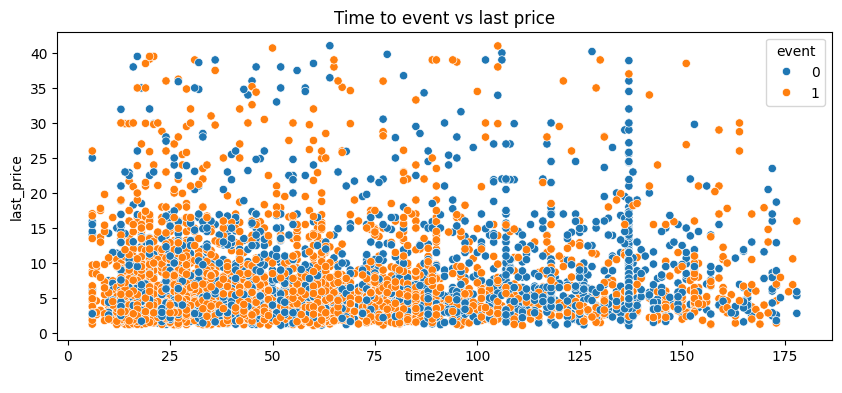

In [96]:
# Distribution of parking spaces
plt.figure(figsize=(10, 4))
plt.title("Time to event vs last price")
sns.scatterplot(data = df, x = 'time2event', y='last_price', hue = 'event')
plt.show()

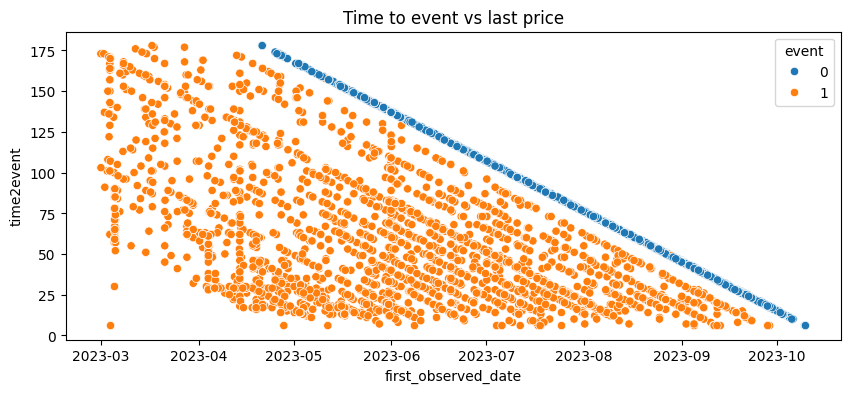

In [98]:
# Distribution of parking spaces
plt.figure(figsize=(10, 4))
plt.title("Time to event vs last price")
sns.scatterplot(data = df, x = 'first_observed_date', y='time2event', hue = 'event')
plt.show()

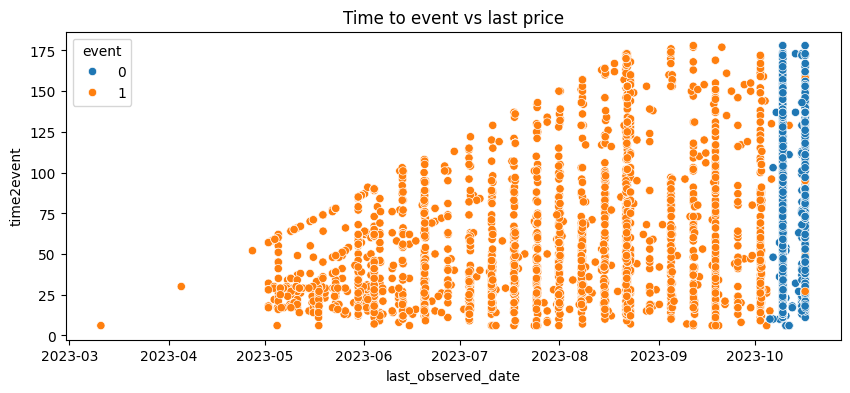

In [108]:
# Distribution of parking spaces
plt.figure(figsize=(10, 4))
plt.title("Time to event vs last price")
sns.scatterplot(data = df, x = 'last_observed_date', y='time2event', hue = 'event')
plt.show()

Correlation heatmap

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4739 entries, 0 to 4738
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   event                         4739 non-null   int64         
 1   time2event                    4739 non-null   int64         
 2   property_type                 4739 non-null   object        
 3   surface_total                 4739 non-null   float64       
 4   num_bathrooms                 4739 non-null   float64       
 5   num_bedrooms                  4739 non-null   float64       
 6   marketplace_hash              4739 non-null   object        
 7   seller_hash                   4739 non-null   object        
 8   num_parking_lots              4739 non-null   float64       
 9   last_price                    4739 non-null   float64       
 10  price_change_pct              4739 non-null   float64       
 11  longitude                     

In [54]:
df1 = df.drop(columns=['property_type', 'marketplace_hash', 'seller_hash', 'first_observed_date', 'last_observed_date', 'has_balcony', 'has_elevator', 'has_garden', 'has_gym', 'has_luxury_features', 'has_pool', 'has_studio', 'has_surveillance', 'has_terrace', 'has_visitors_parking', 'has_washing_area'])

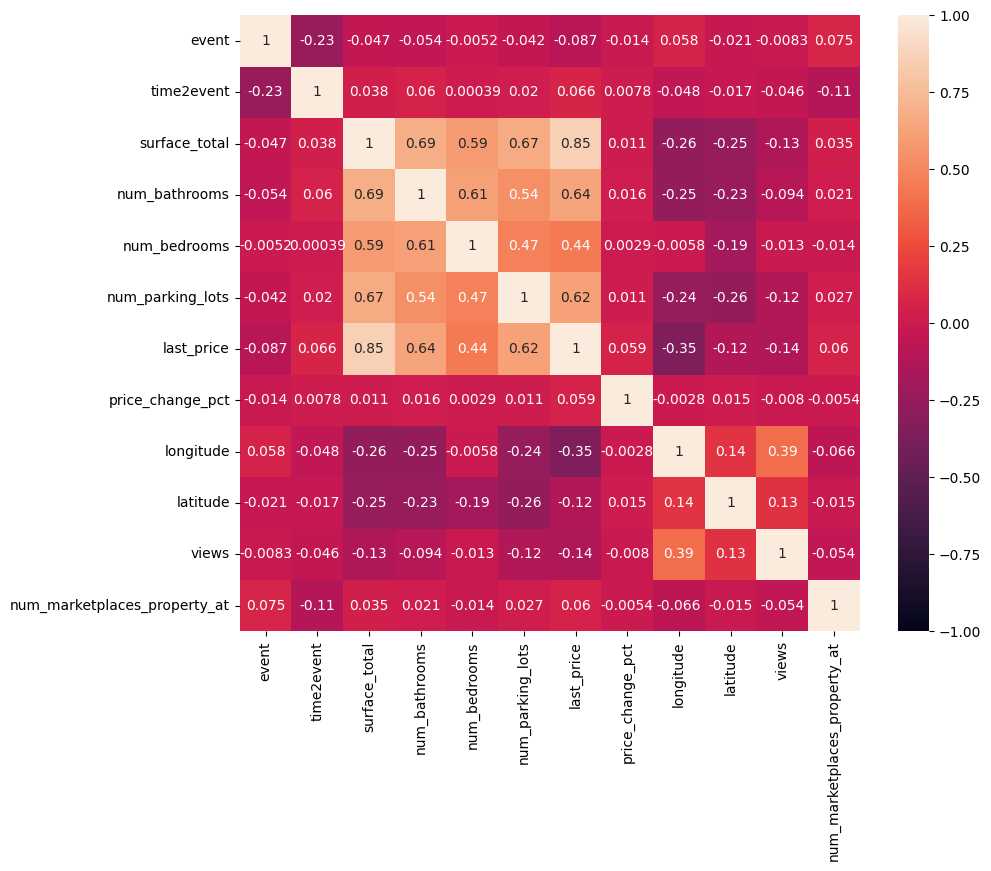

In [57]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)